# Importing the Libraries Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Step 1: Data Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv('Employee Attrition data.csv')

In [3]:
# Data Preprocessing
# Handling missing values
data = data.dropna()

In [4]:
# Encoding categorical variables
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [5]:
# Scaling numerical variables
scaler = StandardScaler()
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[num_cols] = scaler.fit_transform(data[num_cols])

# Step 2: Exploratory Data Analysis (EDA)

In [6]:
# Summary statistics
print(data.describe())

         EmployeeID           Age    Attrition  BusinessTravel   Department  \
count  4.300000e+03  4.300000e+03  4300.000000     4300.000000  4300.000000   
mean   1.057552e-16 -3.228425e-16     0.161628        1.607209     1.260698   
std    1.000116e+00  1.000116e+00     0.368152        0.665778     0.528499   
min   -1.738009e+00 -2.069550e+00     0.000000        0.000000     0.000000   
25%   -8.655435e-01 -7.574230e-01     0.000000        1.000000     1.000000   
50%    2.991332e-03 -1.013593e-01     0.000000        2.000000     1.000000   
75%    8.668090e-01  6.640483e-01     0.000000        2.000000     2.000000   
max    1.727482e+00  2.522895e+00     1.000000        2.000000     2.000000   

       DistanceFromHome     Education  EducationField  EmployeeCount  \
count      4.300000e+03  4.300000e+03     4300.000000         4300.0   
mean       6.361836e-17 -1.718522e-16        2.247442            0.0   
std        1.000116e+00  1.000116e+00        1.328794            0.0   


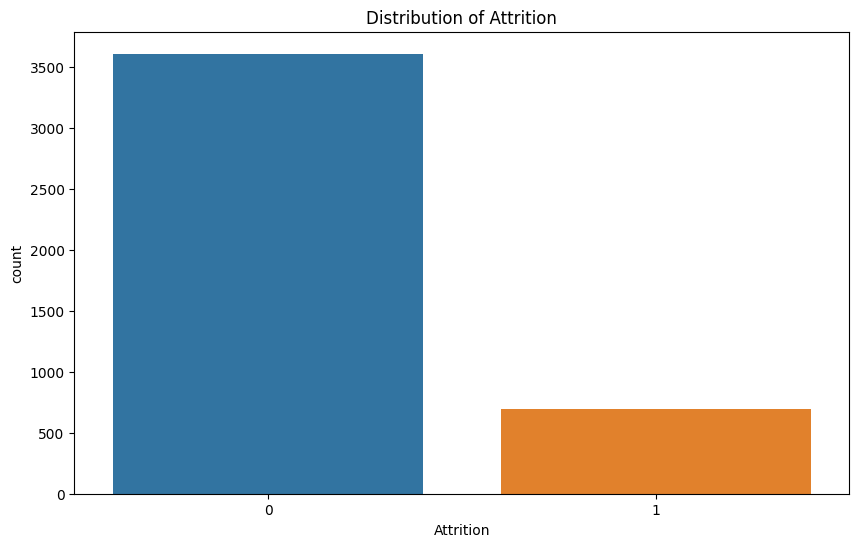

In [7]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Distribution of Attrition')
plt.show()

C:\Users\SVPPREDDY\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


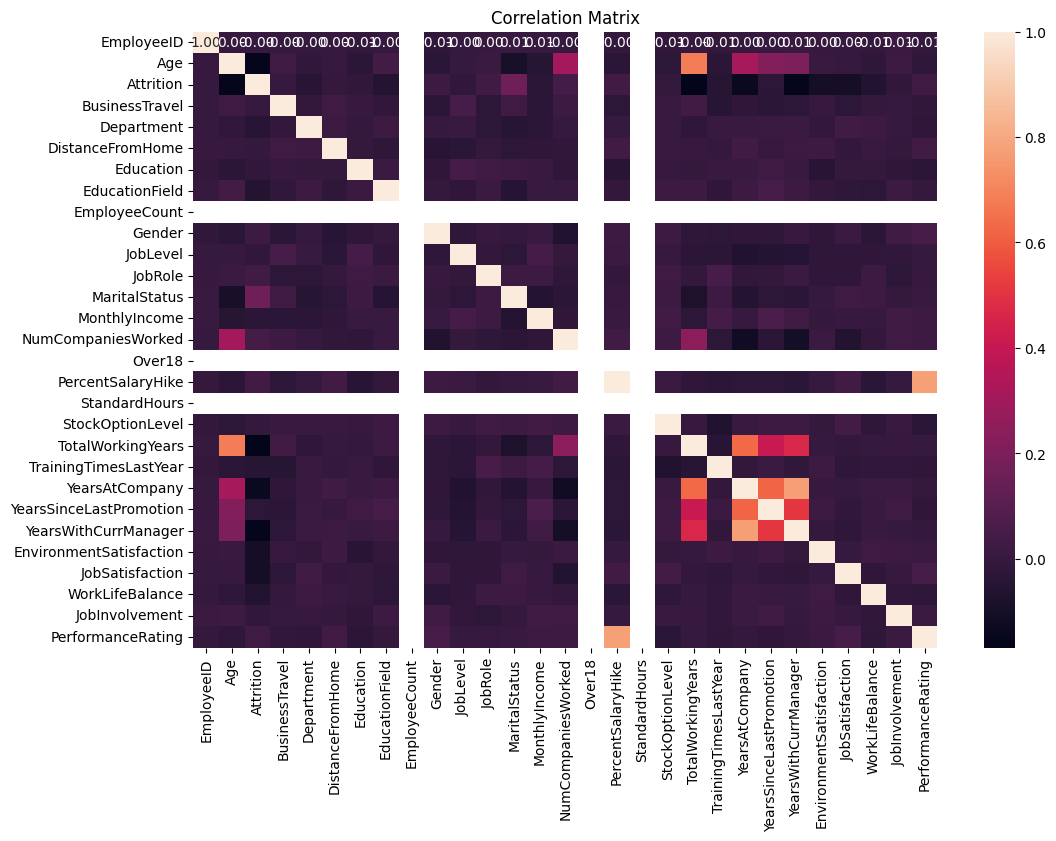

In [8]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Distribution of target variable
print(data['Attrition'].value_counts())

Attrition
0    3605
1     695
Name: count, dtype: int64


# Step 3: Statistical Analysis

In [10]:
# Hypothesis testing and feature importance can be included as needed

In [11]:
from scipy.stats import ttest_ind, chi2_contingency

# Separate the data into two groups based on attrition
attrition = data[data['Attrition'] == 1]
no_attrition = data[data['Attrition'] == 0]

# T-test for numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
t_test_results = {}
for col in numerical_features:
    t_test_results[col] = ttest_ind(attrition[col], no_attrition[col])

# Display t-test results
print("T-test Results:")
for feature, result in t_test_results.items():
    print(f"{feature}: statistic={result.statistic:.2f}, p-value={result.pvalue:.2e}")

# Chi-square test for categorical features
categorical_features = data.select_dtypes(include=['object']).columns
chi2_results = {}
for col in categorical_features:
    contingency_table = pd.crosstab(data[col], data['Attrition'])
    chi2_results[col] = chi2_contingency(contingency_table)

# Display chi-square test results
print("\nChi-square Test Results:")
for feature, result in chi2_results.items():
    print(f"{feature}: chi2_statistic={result[0]:.2f}, p-value={result[1]:.2e}")

T-test Results:
EmployeeID: statistic=-0.11, p-value=9.11e-01
Age: statistic=-10.33, p-value=1.05e-24
DistanceFromHome: statistic=-0.55, p-value=5.86e-01
Education: statistic=-1.00, p-value=3.18e-01
EmployeeCount: statistic=nan, p-value=nan
JobLevel: statistic=-0.96, p-value=3.39e-01
MonthlyIncome: statistic=-2.14, p-value=3.24e-02
NumCompaniesWorked: statistic=2.88, p-value=3.98e-03
PercentSalaryHike: statistic=2.26, p-value=2.40e-02
StandardHours: statistic=nan, p-value=nan
StockOptionLevel: statistic=-0.52, p-value=6.01e-01
TotalWorkingYears: statistic=-11.22, p-value=8.49e-29
TrainingTimesLastYear: statistic=-3.03, p-value=2.42e-03
YearsAtCompany: statistic=-8.84, p-value=1.39e-18
YearsSinceLastPromotion: statistic=-1.96, p-value=4.97e-02
YearsWithCurrManager: statistic=-10.31, p-value=1.17e-24
EnvironmentSatisfaction: statistic=-6.82, p-value=1.03e-11
JobSatisfaction: statistic=-6.80, p-value=1.23e-11
WorkLifeBalance: statistic=-3.93, p-value=8.68e-05
JobInvolvement: statistic=-0.

# Step 4: Model Building

In [12]:
# Split the data into training and testing sets
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")

Logistic Regression Accuracy: 0.85


In [14]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Accuracy: 0.98


In [15]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(f"Tuned Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.2f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\SVPPREDDY\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Tuned Random Forest Accuracy: 0.99


# Step 5: Model Evaluation

In [16]:
print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1081
           1       0.97      0.93      0.95       209

    accuracy                           0.99      1290
   macro avg       0.98      0.96      0.97      1290
weighted avg       0.99      0.99      0.99      1290



In [17]:
# ROC Curve
roc_auc = roc_auc_score(y_test, y_pred_best_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_rf)

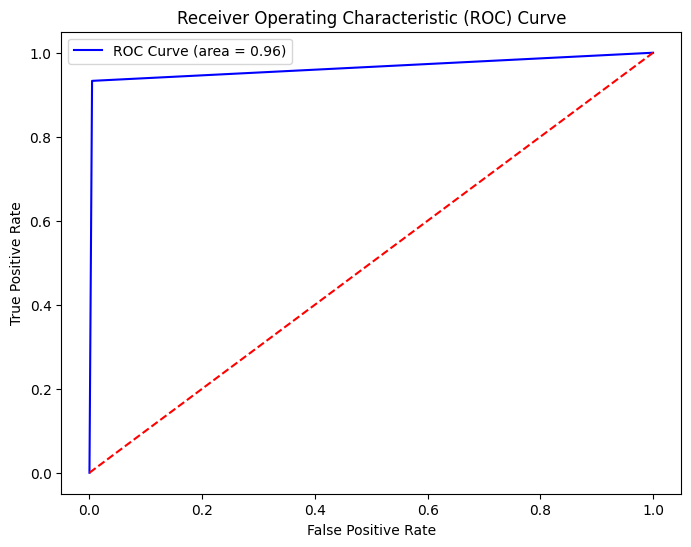

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Step 6: User Interface

In [19]:
# Gradio can be used to create an interactive interface for our model

In [20]:
pip install gradio --upgrade


  Using cached gradio-4.36.0-py3-none-any.whl.metadata (15 kB)
Using cached gradio-4.36.0-py3-none-any.whl (12.3 MB)
  Attempting uninstall: gradio
    Found existing installation: gradio 4.27.0
    Uninstalling gradio-4.27.0:
      Successfully uninstalled gradio-4.27.0


In [27]:
import gradio as gr

# Function to predict attrition
def predict_attrition(input_data):
    input_df = pd.DataFrame([input_data])
    for column in label_encoders.keys():
        input_df[column] = label_encoders[column].transform(input_df[column])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    prediction = best_clf.predict(input_df)
    return "Yes" if prediction[0] == 1 else "No"

# Create Gradio interface
inputs = [gr.Textbox(label=col) for col in X.columns]
output = gr.Textbox(label="Attrition Prediction")

gr.Interface(fn=predict_attrition, inputs=inputs, outputs=output, title="Employee Attrition Prediction").launch(share=True)

C:\Users\SVPPREDDY\anaconda3\Lib\site-packages\gradio\utils.py:1000: UserWarning: Expected 1 arguments for function <function predict_attrition at 0x000002B2711D5300>, received 28.
  warnings.warn(
C:\Users\SVPPREDDY\anaconda3\Lib\site-packages\gradio\utils.py:1008: UserWarning: Expected maximum 1 arguments for function <function predict_attrition at 0x000002B2711D5300>, received 28.
  warnings.warn(


Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://27191092e458a938d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
